# In this notebook we will fit a linear model to predict the petal width of a flower, given some other characteristics of the flower

In [1]:
import numpy as np
import pandas as pd

from collections import Counter
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


# load iris dataset

In [2]:
iris_dataset = load_iris()

In [4]:
# load iris dataset 'data' field into a pandas DataFrame
df = pd.DataFrame(data=iris_dataset['data'], columns=iris_dataset['feature_names'])

# Data exploration

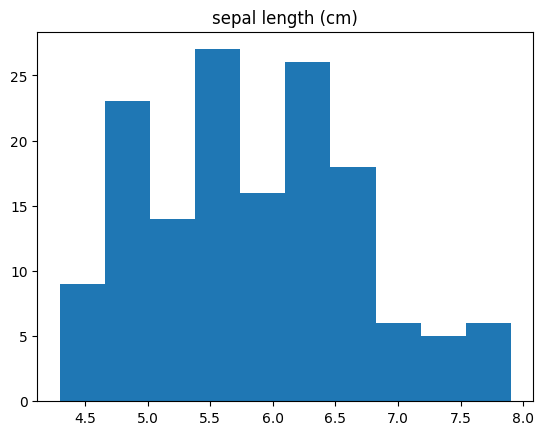

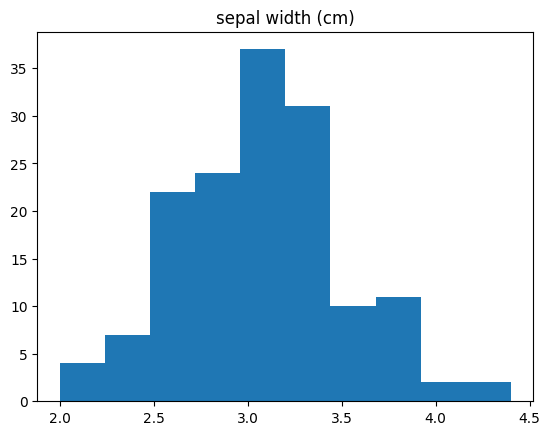

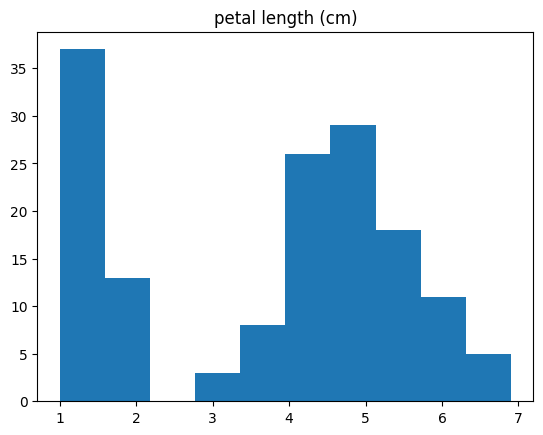

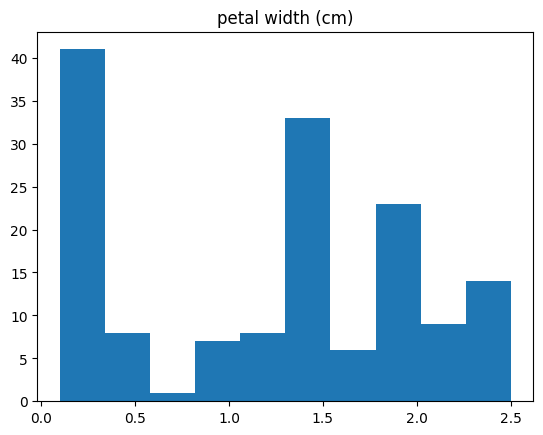

In [5]:
# plot the histogram of each feature
from operator import truediv


for column_name in df.columns:
    plt.hist(df[column_name])
    plt.title(column_name)
    plt.show()

In [ ]:
# determine the minimum and the maximum value of each feature


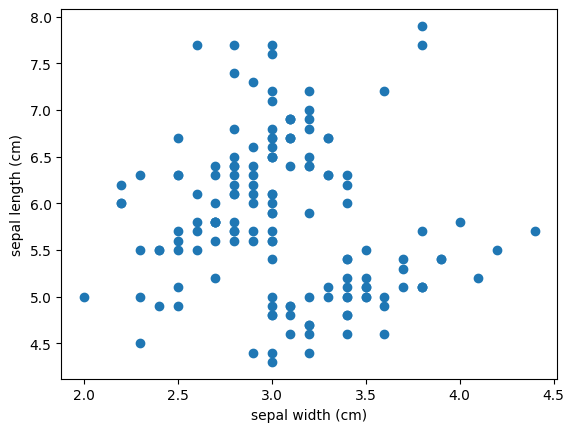

In [6]:
# visualize the dependency of 'sepal length (cm)' on all other input variables via scatter-plots
# wich other variable seems to be most linerly correlated with 'sepal length (cm)'?



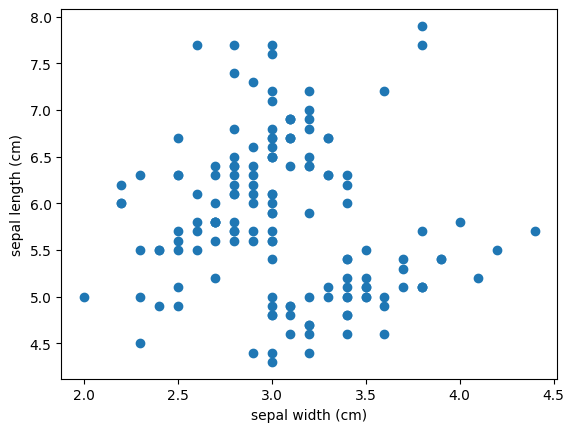

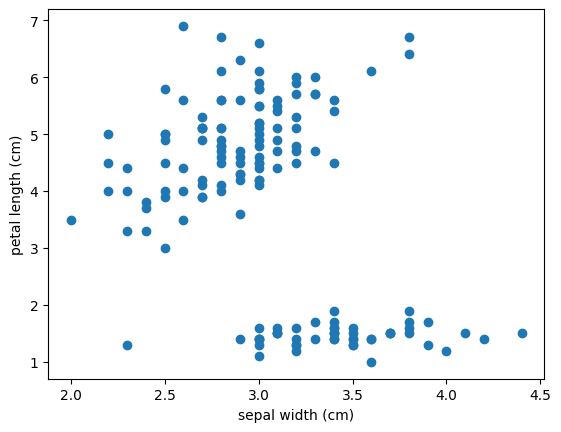

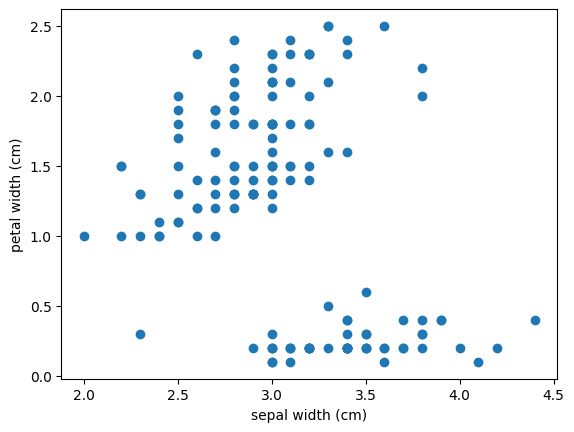

In [9]:
for y_variable_name in df.columns:
    if y_variable_name != 'sepal width (cm)':
        y = df[y_variable_name]
        x = df['sepal width (cm)']
        plt.scatter(x,y)
        plt.xlabel('sepal width (cm)')
        plt.ylabel(y_variable_name)
        plt.show()

# Initialize model

In [10]:
# initialize a linear model
linear_regression = LinearRegression()

# Data creation and split

In [12]:
# use 'petal width (cm)' as input variable, to predict 'sepal length (cm)'. Create train and test datasets.
x = df[['petal width (cm)']]
y = df[['sepal width (cm)']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model fit

In [13]:
# fit the model, and visualize the fitted parameters
linear_regression.fit(x_train, y_train)

LinearRegression()

# Model prediction

In [14]:
# get the predicted values on the test set
linear_regression.coef_

array([[-0.22059988]])

In [15]:
linear_regression.intercept_

array([3.32270986])

In [16]:
linear_regression.predict(x_test)

array([[3.05799   ],
       [3.2565299 ],
       [2.81533013],
       [2.99181004],
       [3.01387003],
       [3.23446991],
       [3.03593001],
       [2.81533013],
       [2.99181004],
       [3.05799   ],
       [2.8815101 ],
       [3.30064987],
       [3.27858988],
       [3.30064987],
       [3.2565299 ],
       [2.96975005],
       [2.83739012],
       [3.08004999],
       [3.03593001],
       [2.83739012],
       [3.27858988],
       [2.92563007],
       [3.23446991],
       [2.85945011],
       [2.8815101 ],
       [2.81533013],
       [2.92563007],
       [2.81533013],
       [3.2565299 ],
       [3.27858988]])

# Evaluate the error 

In [5]:
# evaluate the mean-squared error 
y_pred = linear_regression.predict(x_test)
mean_squared_error(y_pred, y_test, squared=True)

# Plot the regression

In [6]:
# plot the regression

# Do a 5-fold cross-validation

In [18]:
# 5-fold cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
x_variable = 'petal width (cm)'
y_variable = 'sepal length (cm)'
x = df[[x_variable]]
y = df[[y_variable]]
all_mse = []

for train_indexes, test_indexes in kf.split(x):
    x_train = x.iloc[train_indexes]
    y_train = y.iloc[train_indexes]
    x_test = x.iloc[test_indexes]
    y_test = y.iloc[test_indexes]

    linear_regression = LinearRegression()
    linear_regression.fit(x_train, y_train)
    pred = linear_regression.predict(x_test)
    mse = mean_squared_error(pred, y_test)
    all_mse.append(mse)


In [19]:
all_mse

[0.11733885396541785,
 0.1989559816892426,
 0.15492081454271803,
 0.3486635175814393,
 0.31829346964336264]

In [21]:
average_mse = np.average(all_mse)
std_mse = np.std(all_mse)
print(average_mse)
print(std_mse)

0.22763452748443608
0.09071046121918633


# Evaluate the other variables

In [7]:
# do the same for the other 2 possible input variables: which is the one that predicts the output best?


# Fit a 2-dimensional linear regression